# LSTM Model for stock price prediction (Long Term)

Epoch 1/100
34/34 [==============================] - 24s 540ms/step - loss: 0.0488
Epoch 2/100
34/34 [==============================] - 19s 560ms/step - loss: 0.0039
Epoch 3/100
34/34 [==============================] - 19s 539ms/step - loss: 0.0028
Epoch 4/100
34/34 [==============================] - 17s 515ms/step - loss: 0.0023
Epoch 5/100
34/34 [==============================] - 17s 514ms/step - loss: 0.0020
Epoch 6/100
34/34 [==============================] - 21s 625ms/step - loss: 0.0023
Epoch 7/100
34/34 [==============================] - 19s 563ms/step - loss: 0.0018
Epoch 8/100
34/34 [==============================] - 18s 538ms/step - loss: 0.0020
Epoch 9/100
34/34 [==============================] - 22s 663ms/step - loss: 0.0019
Epoch 10/100
34/34 [==============================] - 30s 876ms/step - loss: 0.0026
Epoch 11/100
34/34 [==============================] - 24s 695ms/step - loss: 0.0036
Epoch 12/100
34/34 [==============================] - 22s 646ms/step - loss: 0.0021
E

C:\Users\Shemeen62\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 3s 181ms/step


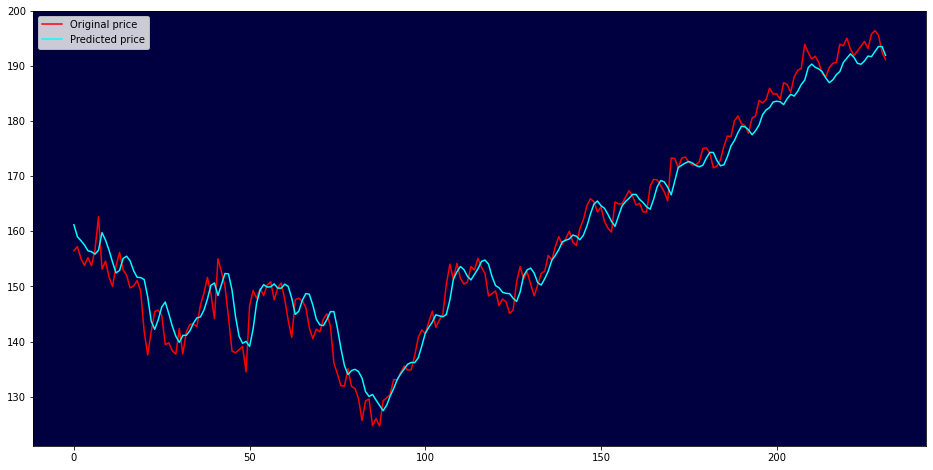

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

tk = 'AAPL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2018-01-01')

df = df['Close'].values
df = df.reshape(-1, 1)


dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)


def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y


x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


model = Sequential()
model.add(LSTM(units=250, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=250,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=250,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=250))
model.add(Dropout(0.2))
model.add(Dense(units=1))


# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train, epochs=100, batch_size=32)
model.save(tk+'_stock_prediction.h5')

model = load_model(tk+'_stock_prediction.h5')


predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Calculate mean squared error (MSE) and mean absolute error (MAE)
mse = mean_squared_error(y_test_scaled, predictions)
mae = mean_absolute_error(y_test_scaled, predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 11.284722585035869
Mean Absolute Error (MAE): 2.6114609816978716


# Future predictions

1/1 [==============================] - 0s 38ms/step


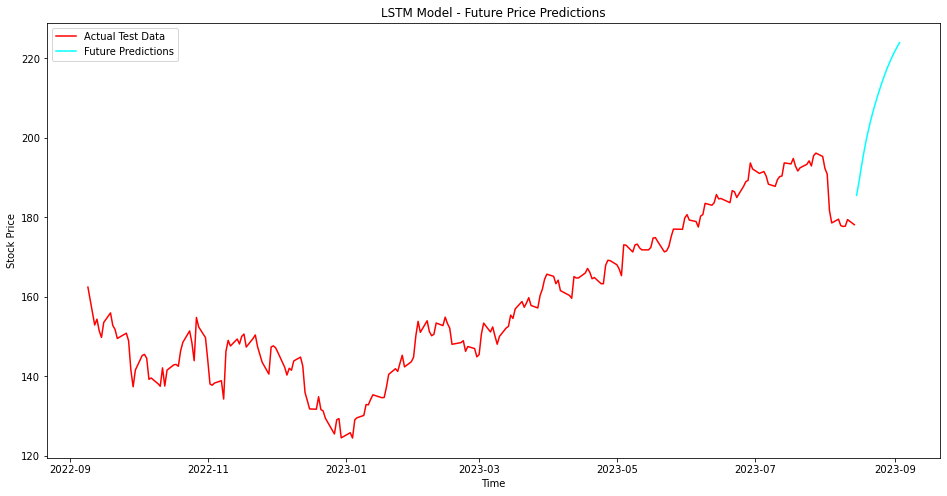

In [16]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import joblib

tk = 'AAPL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2018-01-01')

df_original = df.copy()

df = df['Close'].values
df = df.reshape(-1, 1)

dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x, y

x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

model = Sequential()
model.add(LSTM(units=250, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=250, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=250, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=250))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train, epochs=100, batch_size=32)

# Save the trained model to a file using joblib
joblib.dump(scaler, tk + '_scaler.joblib')
model.save(tk + '_stock_prediction_new.keras')

# Load the saved model and scaler
loaded_scaler = joblib.load(tk + '_scaler.joblib')
loaded_model = load_model(tk + '_stock_prediction_new.keras')

# Get user input for predicting prices for the next n days
n = 20

# Initialize an array to store the future predictions
future_predictions = []

# Initialize last_data_point with the last 50 data points of the test dataset
last_data_point = dataset_test[-50:]

# Make predictions for the next n days
for _ in range(n):
    # Reshape last_data_point to match the expected shape of the model
    input_data = last_data_point.reshape(1, 50, 1)

    # Make a prediction using the loaded model
    prediction = loaded_model.predict(input_data)

    # Append the prediction to the list of future predictions
    future_predictions.append(prediction[0, 0])

    # Update last_data_point for the next iteration
    last_data_point = np.roll(last_data_point, -1)
    last_data_point[-1] = prediction[0, 0]

# Generate date range for the next n days
last_date = df_original.index[-1]  # Use the index of the original DataFrame
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=n)

# Inverse transform predictions
future_predictions = loaded_scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Convert the original scaled dataset_test back to original scale for comparison
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting the future predicted prices along with actual test data
plt.figure(figsize=(16, 8))
plt.plot(df_original.index[-len(y_test_scaled):], y_test_scaled, color='red', label='Actual Test Data')
plt.plot(future_dates, future_predictions, color='cyan', label='Future Predictions')
plt.title('LSTM Model - Future Price Predictions')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Feature Engineering by adding trading volumes

Epoch 1/100
34/34 [==============================] - 34s 791ms/step - loss: 0.0808
Epoch 2/100
34/34 [==============================] - 35s 1s/step - loss: 0.0033
Epoch 3/100
34/34 [==============================] - 31s 911ms/step - loss: 0.0028
Epoch 4/100
34/34 [==============================] - 31s 910ms/step - loss: 0.0025
Epoch 5/100
34/34 [==============================] - 31s 903ms/step - loss: 0.0023
Epoch 6/100
34/34 [==============================] - 32s 929ms/step - loss: 0.0029
Epoch 7/100
34/34 [==============================] - 32s 933ms/step - loss: 0.0022
Epoch 8/100
34/34 [==============================] - 30s 893ms/step - loss: 0.0030
Epoch 9/100
34/34 [==============================] - 31s 921ms/step - loss: 0.0023
Epoch 10/100
34/34 [==============================] - 31s 920ms/step - loss: 0.0023
Epoch 11/100
34/34 [==============================] - 31s 912ms/step - loss: 0.0020
Epoch 12/100
34/34 [==============================] - 30s 892ms/step - loss: 0.0021
Epoc

34/34 [==============================] - 29s 844ms/step - loss: 0.0012
Epoch 100/100
1/1 [==============================] - 0s 41ms/step


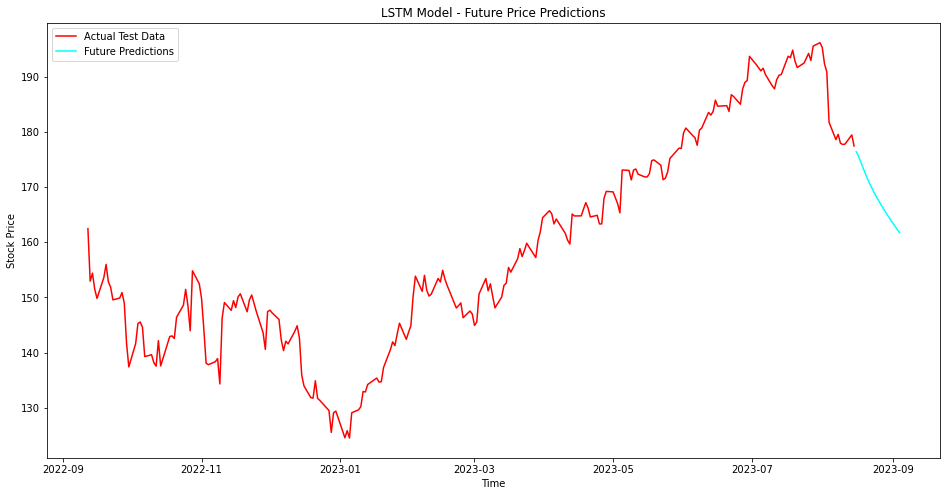

In [20]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import joblib

tk = 'AAPL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2018-01-01')

df_original = df.copy()

df = df['Close'].values
df = df.reshape(-1, 1)

dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

# Fetch additional features (e.g., trading volume) from the original DataFrame
additional_features = df_original[['Volume']].values

# Keep the same number of rows as your closing prices data (dataset_train)
additional_features = additional_features[:len(dataset_train)]

# Normalize additional features
scaler_additional = MinMaxScaler(feature_range=(0, 1))
additional_features_scaled = scaler_additional.fit_transform(additional_features)

# Combine the normalized additional features with the normalized closing prices
combined_features = np.concatenate((dataset_train, additional_features_scaled), axis=1)

def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x, y

# Create the training dataset with additional features
x_train, y_train = create_dataset(combined_features)

# x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

model = Sequential()
model.add(LSTM(units=250, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=250, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=250, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=250))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train, epochs=100, batch_size=32)

# Save the trained model to a file using joblib
joblib.dump(scaler, tk + '_scaler.joblib')
model.save(tk + '_stock_prediction_new.keras')

# Load the saved model and scaler
loaded_scaler = joblib.load(tk + '_scaler.joblib')
loaded_model = load_model(tk + '_stock_prediction_new.keras')

# Get user input for predicting prices for the next n days
n = 20

# Initialize an array to store the future predictions
future_predictions = []

# Initialize last_data_point with the last 50 data points of the test dataset
last_data_point = dataset_test[-50:]

# Make predictions for the next n days
for _ in range(n):
    # Reshape last_data_point to match the expected shape of the model
    input_data = last_data_point.reshape(1, 50, 1)

    # Make a prediction using the loaded model
    prediction = loaded_model.predict(input_data)

    # Append the prediction to the list of future predictions
    future_predictions.append(prediction[0, 0])

    # Update last_data_point for the next iteration
    last_data_point = np.roll(last_data_point, -1)
    last_data_point[-1] = prediction[0, 0]

# Generate date range for the next n days
last_date = df_original.index[-1]  # Use the index of the original DataFrame
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=n)

# Inverse transform predictions
future_predictions = loaded_scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Convert the original scaled dataset_test back to original scale for comparison
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting the future predicted prices along with actual test data
plt.figure(figsize=(16, 8))
plt.plot(df_original.index[-len(y_test_scaled):], y_test_scaled, color='red', label='Actual Test Data')
plt.plot(future_dates, future_predictions, color='cyan', label='Future Predictions')
plt.title('LSTM Model - Future Price Predictions')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()